## Reproduces Extended Data Figure 7(b) in Lauer et al., Nature Methods 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def plot_mAP(filename):

    f = open(filename, 'rb')
    data = pickle.load(f)[0]

    topdown_with_paf_lists = data['topdown_with_paf']
    topdown_without_paf_lists = data['topdown_without_paf']
    bottom_up_mAP_lists = data['bottom_up']

    graph_list = [
                [11,17,23,29,35,41,47,53,59,66],
                [4, 5, 6, 7, 8, 9, 10],
                [14, 24, 34, 44, 54, 64, 74, 84, 94, 105],
                [4, 5, 6, 7, 8, 9, 10],
                ]

    plt.style.use('ggplot')

    title = f'DLCR50_ms5_s4.png'
    fig, axes = plt.subplots(1, 4, figsize=(11, 4), tight_layout=True, sharey='row')
    axes[0].set_ylabel('mAP', fontsize=10)
    colors = ['slategray', '#e2a6a6']  ### bottom up
    c_topdown = ['#458F3B', '#C8DE82']
    
    for n, (topdown_with_paf_list, topdown_without_paf_list, bu_mAP_list, graph) in enumerate(zip(topdown_with_paf_lists, topdown_without_paf_lists, bottom_up_mAP_lists, graph_list)):
        
        ax = axes[n]
        topdown_with_paf_mAP = topdown_with_paf_list[0]
        bu_map_list = bu_mAP_list
        topdown_without_paf_list = topdown_without_paf_list[0]*len(graph)

        ### bottom up
        for i in range(len(bu_map_list)):
            ax.plot(graph, bu_map_list[i], c=colors[i], lw=2)

        ### top down without paf 
        ax.plot(graph, topdown_without_paf_list, c=c_topdown[0], lw=2)
                
        ### top down with paf + GT bbox
        ax.plot(graph, topdown_with_paf_mAP, c=c_topdown[1], lw=2)

#         ax.set_ylim([0, 1])
        ax.set_xticks(graph)
        ax.set_xlabel('Graph size', fontsize=10)
        ax.yaxis.get_major_locator().set_params(integer=True)
        if n in (0, 2):
            for label in ax.get_xticklabels()[1::2]:
                label.set_visible(False)

    for ax in axes.flatten():
        ax.tick_params(axis='y', length=0)
        ax.tick_params(axis='x', length=0)
        
    fig.align_ylabels()
    plt.ylim((0, 1))

    my_y_ticks = np.arange(0, 1, 0.2)
    plt.yticks(my_y_ticks)
    
    patches = [
        plt.Line2D([0, 0], [0, 0], color=colors[0], label="baseline", lw=5),
        plt.Line2D([0, 0], [0, 0], color=colors[1], label="data-driven", lw=5),
        plt.Line2D([0, 0], [0, 0], color=c_topdown[0], label="topdown w/o PAF(GT-bbox)", lw=5),
        plt.Line2D([0, 0], [0, 0], color=c_topdown[1], label="topdown w/ PAF(GT-bbox)", lw=5),
    ]
    fig.legend(
        handles=patches,
        loc="right",
        frameon=False,
        borderaxespad=0.0,
        bbox_to_anchor=[0.27, 0.4]
    )
    
#     axes[0].autoscale(axis='y')
    for ax in axes.flat:
        ax.yaxis.label.set_color('black')
        ax.xaxis.label.set_color('black')
        ax.tick_params(axis='y', colors='black')
        ax.tick_params(axis='x', colors='black')
    
    fig.savefig(title, dpi=800)
    print('save to:', title)


save to: DLCR50_ms5_s4.png


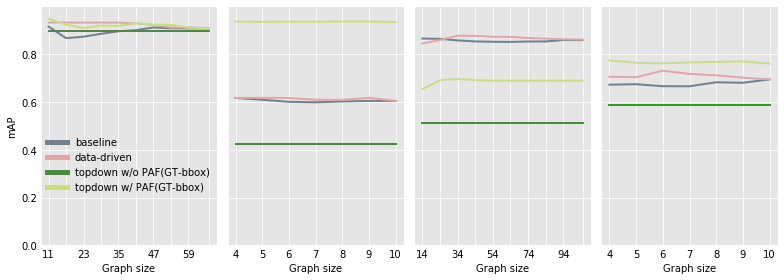

In [3]:
import pickle
filename = '../data/figS7b/mAP_data.pickle'

plot_mAP(filename)